In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 25)

In [3]:
#Download data
telco_data=pd.read_csv('Telco.csv')

In [4]:
#Check the first 5 rows
telco_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Review the data attributes
telco_data.shape

(7043, 21)

In [6]:
#display columns names
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#check the datatypes of each column
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Check the statistical details for the numeric columns
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Average tenure is 32 months and 75% of customers have tenure less than 55 months and maximum tenure among all customers is 72 months

Avergae monthly charges are around $65, 25% of customers pay more than $89 per month

In [9]:
#Check the Churn distribution
telco_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
#Churn percentage
telco_data.Churn.value_counts()/len(telco_data.Churn)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
telco_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing data as per above.

General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis but when deleting the columns, should check if the column value is missing as a result of a related value in another column.

# Data Cleaning



In [13]:
telco_backup=telco_data.copy()

In [14]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges, errors="coerce")


In [15]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3.  After conversion to numeric datatype, there are now 11 null values in the TotalCharges column out of 7043 rows, which is 0.15% of data, the records can be dropped from further analysis

In [16]:
telco_data.dropna(how="any",inplace=True)

In [17]:
labels =  [f"{i}-{i+11}" for i in range(1,72,12)]
bins=list(range(1,80,12))
telco_data['TenureGroup']=pd.cut(telco_data.tenure,bins,labels=labels,right=False)

In [18]:
telco_data.drop(columns=['customerID','tenure'],inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


6.  Rename gender column as Gender

In [19]:
telco_data.rename(columns={'gender':'Gender'},inplace=True)


# Data Exploration

1. Convert 'Churn' to a binary numeric variable(Yes=1 ; No = 0)

In [20]:
telco_data['Churn']=np.where(telco_data['Churn']=='Yes',1,0)

2. Convert all the categorical variables into dummy variables

In [21]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0,0,0


3.  Plot correlation for all predictors with Churn

<AxesSubplot:>

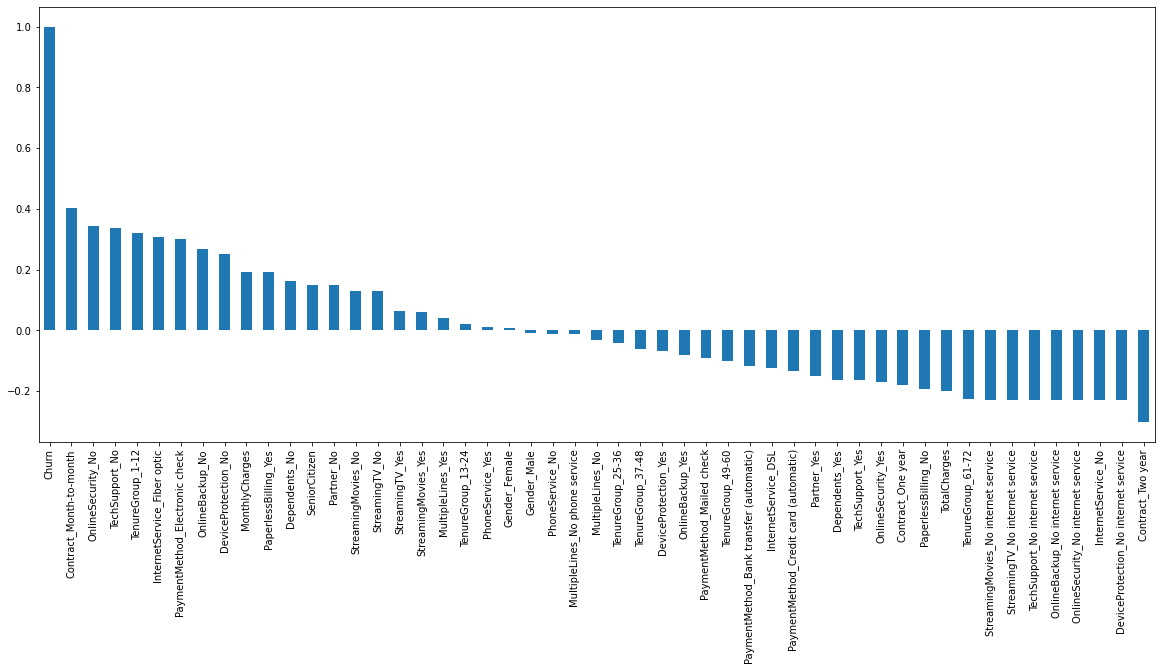

In [22]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

###### Insights:
1.  High churn seen with month-to-month contract type, within first year of subscription ,
connections with no online security, no Tech support, and connections with fiberoptic internet service
2.  Low churn out as the tenure increases, longer contract terms, no internet service
3. Factors like gender and phone services do not have any significant effect


<AxesSubplot:>

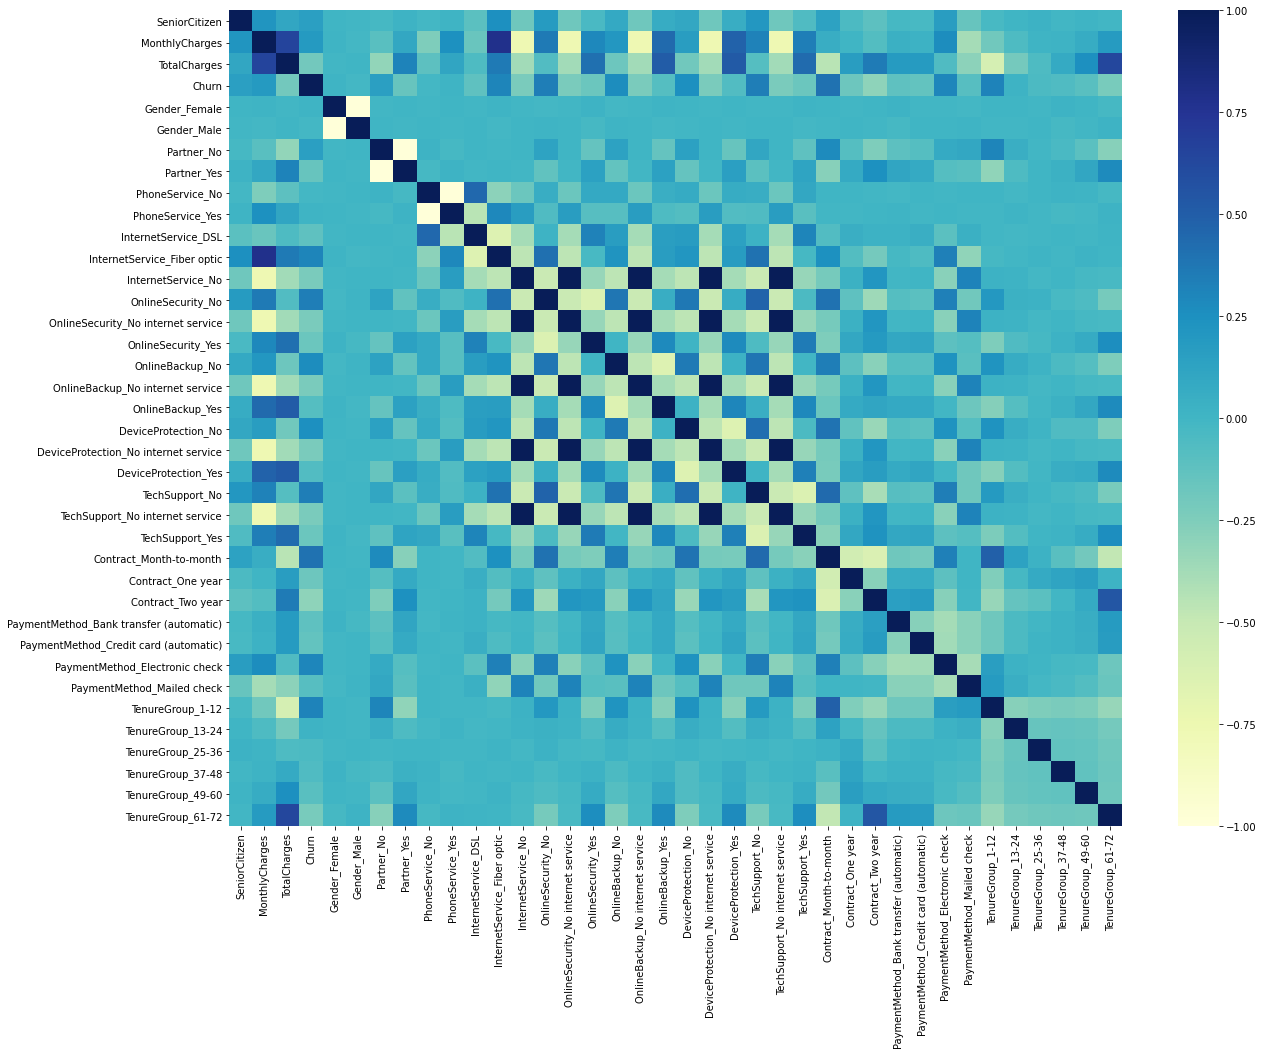

In [23]:
# Insights confirmed by heatmap
temp_data=telco_data.drop(columns=['Dependents','MultipleLines','StreamingTV','StreamingMovies','PaperlessBilling'])
t_dummies=pd.get_dummies(temp_data)
plt.figure(figsize=(20,15))
sns.heatmap(t_dummies.corr(),cmap='YlGnBu')

###### Univariate Analysis
1.  Plot distribution by individual predictors

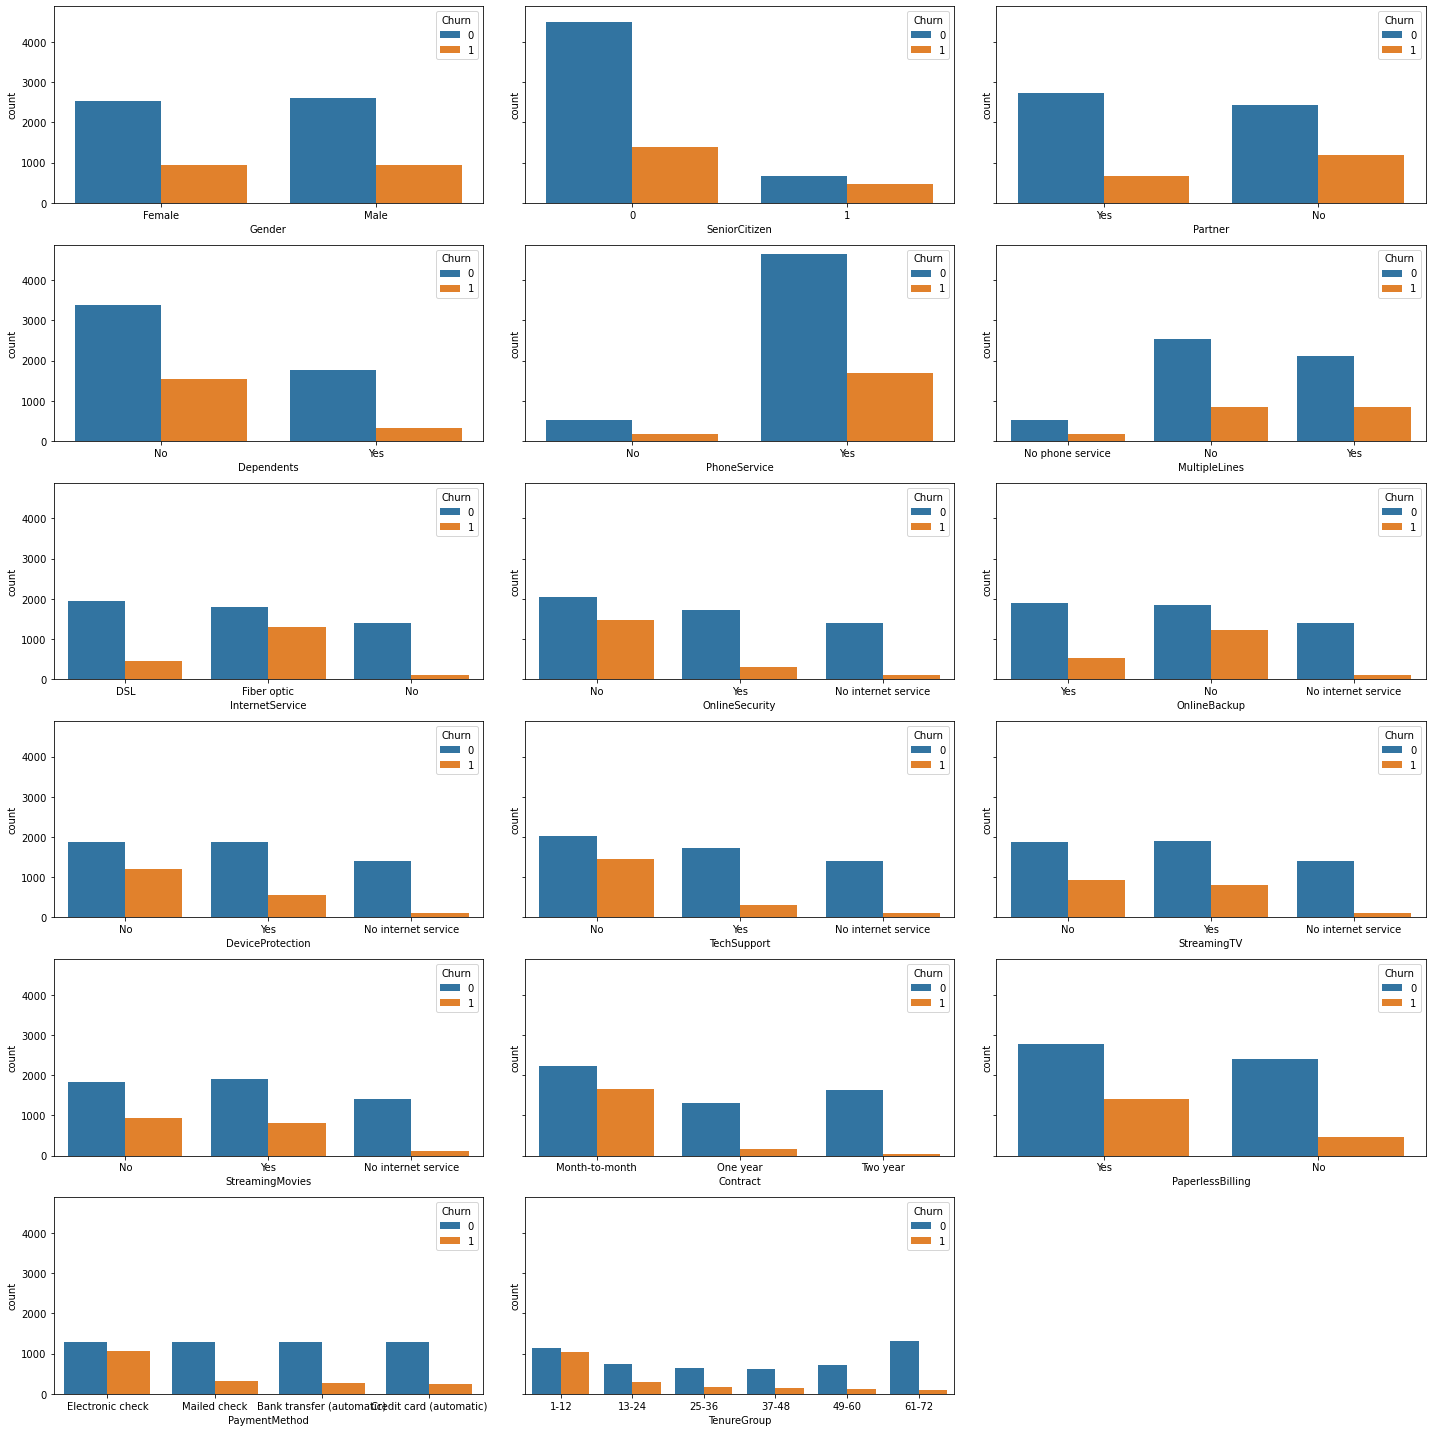

In [24]:
fig,ax=plt.subplots(nrows=6, ncols=3, figsize=(20,20),sharey=True )
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    
    row,col=int(i/3),i%3
    sns.countplot(data=telco_data,x=predictor,hue='Churn',ax=ax[row,col])

fig.delaxes(ax[5,2])
plt.tight_layout()

2. Convert 'Churn' to a binary numeric variable(Yes=1 ; No = 0)

3. Convert all the categorical variables into dummy variables

In [25]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0,0,0


4. Relationship between Monthly and Total Charges

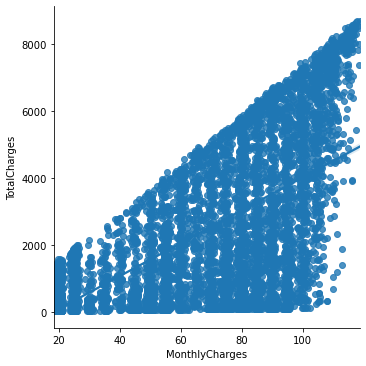

In [26]:
sns.lmplot(data=telco_data_dummies,x='MonthlyCharges',y='TotalCharges')

5. Churn by Monthly Charges and Total Charges

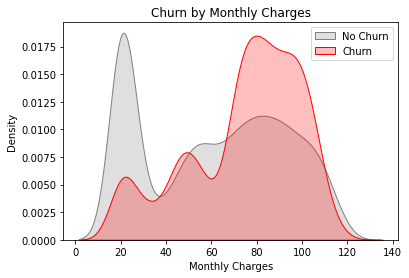

In [27]:
MCharges = sns.kdeplot(telco_data_dummies[(telco_data_dummies["Churn"] == 0) ].MonthlyCharges,
                color="grey", shade = True)
chargesPlt = sns.kdeplot(telco_data_dummies[(telco_data_dummies["Churn"] == 1) ].MonthlyCharges,
                ax =MCharges, color="red", shade= True)
MCharges.legend(["No Churn","Churn"],loc='upper right')
MCharges.set_ylabel('Density')
MCharges.set_xlabel('Monthly Charges')
MCharges.set_title('Churn by Monthly Charges')
plt.show()

###### Insight: Churn is high when monthly charges are higher

6. Churn by total charges

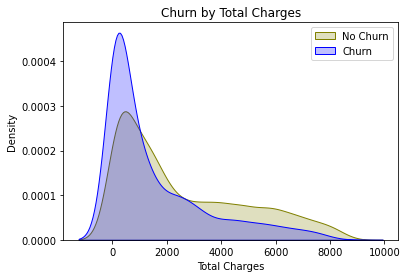

In [28]:
TCharges=sns.kdeplot(telco_data_dummies[telco_data_dummies['Churn']==0].TotalCharges, color="olive", shade=True)
TCharges=sns.kdeplot(telco_data_dummies[telco_data_dummies['Churn']==1].TotalCharges, ax=TCharges, color='blue', shade=True)
TCharges.legend(['No Churn','Churn'], loc='upper right')
TCharges.set_xlabel("Total Charges")
TCharges.set_ylabel("Density")
TCharges.set_title("Churn by Total Charges")
plt.show()

###### Insight: Higher churn rate at lower total charges.
    
Looking at this alongside the montlhly charges, we can infer that higher monthly charges at lower tenure may be related to 
the higher churn rate at lower tenure

7.  Churn by Tenure


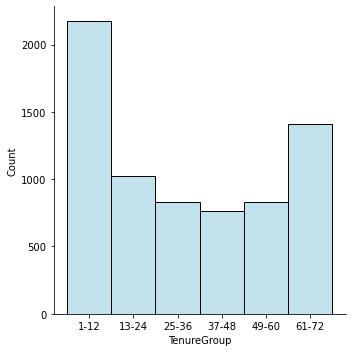

In [29]:
Tenure=sns.displot(telco_data['TenureGroup'],kind='hist', color='lightblue')
plt.show()

###### Bivariate Analysis


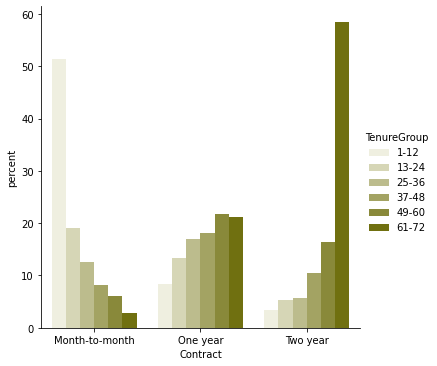

In [30]:
x,y = 'Contract','TenureGroup'
t=(telco_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', color='olive'))


###### Insight: More than 50% of month-to-month contract customers drop within 12 months while more than 50% of 2-year contract customers tend to continue for more than 5 years

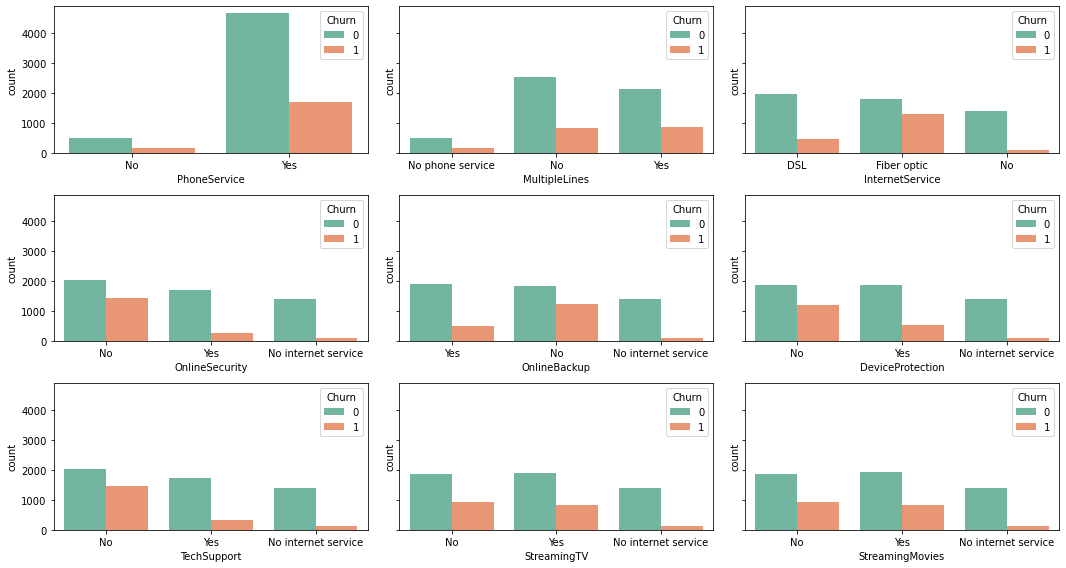

In [64]:
Services=['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
fig,ax=plt.subplots(nrows=3, ncols=3, figsize=(15,8),sharey=True )
for i, predictor in enumerate(Services):
    
    row,col=int(i/3),i%3
    sns.countplot(data=telco_data,x=predictor,hue='Churn',ax=ax[row,col], palette="Set2")
   
plt.tight_layout()
plt.show()

Payment Method 

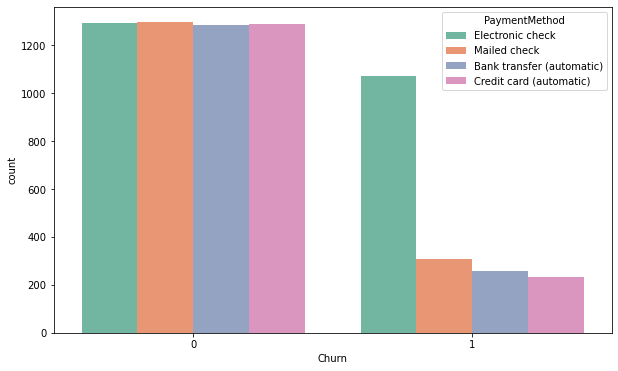

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(data = telco_data, x= 'Churn', order=telco_data['Churn'].value_counts()\
              .index,hue = 'PaymentMethod',palette='Set2') 

plt.show()